In [96]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
pd.options.display.max_columns = None

**Datasource** applied from https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [97]:
url = '../../Datasets/student/student-mat.csv'
students = pd.read_csv(url, sep=';')
''''pd.options.display.max_columns = None'''
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [98]:
num_students = students.select_dtypes(include = np.number)
num_students

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19
9,15,3,4,1,2,0,5,5,1,1,1,5,0,14,15,15


<h3><span style="color:red"> Pearson Correlation</span></h3>
<br>
looking for numeric columns then, finding <b>pearson correlation</b> between G3 and numerical attributes

**We are finding all correlations with G3 attribute**
<br>
Looping all numerical columns and calculating correlations and p-value's

In [105]:
#Creating pearson correlation and p-value for the attributes
column_pearson_corr = []
column_pearson_p_value = []

for col in range(num_students.shape[1]):
    pearson_corr = stats.pearsonr(num_students['G3'], num_students[num_students.columns[col]])
    column_pearson_corr.append(pearson_corr[0])
    column_pearson_p_value.append(pearson_corr[1])
    
'''print(len(column_pearson_corr))
print(len(column_pearson_p_value))
print(len(num_students.columns.to_numpy()))
print(column_pearson_corr)'''

# creating DataFrame for all correlations
corr_df = {'Column Name': num_students.columns.to_numpy(),
           'Pearson Correlation': column_pearson_corr,
           'Pearson P-Value': column_pearson_p_value}

all_df = pd.DataFrame(corr_df, columns = ['Column Name', 'Pearson Correlation', 'Pearson P-Value'])
all_df = all_df.sort_values(by = ['Pearson Correlation'], ascending=False)
all_df

,Column Name,Pearson Correlation,Pearson P-Value
15,G3,1.000000,0.000000e+00
14,G2,0.904868,7.625719e-148
13,G1,0.801468,9.001430e-90
1,Medu,0.217147,1.336107e-05
2,Fedu,0.152457,2.379973e-03
4,studytime,0.097820,5.206115e-02
6,famrel,0.051363,3.085520e-01
12,absences,0.034247,4.973318e-01
7,freetime,0.011307,8.227402e-01
10,Walc,-0.051939,3.031521e-01


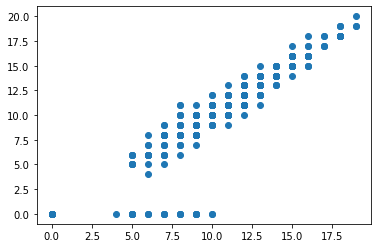

In [110]:
plt.plot(num_students['G2'],num_students['G3'], "o")

<h3><span style="color:red">Spearman Rank Correlation</span></h3>
<br>
looking for numeric columns then, finding <b>pearson correlation</b> between G3 and numerical attributes

In [100]:
#Creating spearman rank correlation and p-value for the attributes
column_spearman_rank_corr = []
column_spearman_rank_p_value = []

for col in range(num_students.shape[1]):
    spearman_rank_corr = stats.spearmanr(num_students['G3'], num_students[num_students.columns[col]])
    column_spearman_rank_corr.append(spearman_rank_corr[0])
    column_spearman_rank_p_value.append(spearman_rank_corr[1])

# creating DataFrame for all correlations
corr_df = {'Column Name': num_students.columns.to_numpy(),
             'Spearman Rank Correlation': column_spearman_rank_corr,
             'Spearman P-Value': column_spearman_rank_p_value
            }

all_df = pd.DataFrame(corr_df, columns = ['Column Name', 'Spearman Rank Correlation', 'Spearman P-Value'])
all_df.sort_values(by = ['Spearman Rank Correlation'], ascending=False)

,Column Name,Spearman Rank Correlation,Spearman P-Value
15,G3,1.000000,0.000000e+00
14,G2,0.957125,1.425342e-213
13,G1,0.878001,8.141180e-128
1,Medu,0.225036,6.290448e-06
2,Fedu,0.170049,6.895636e-04
4,studytime,0.105170,3.667358e-02
6,famrel,0.054977,2.757107e-01
12,absences,0.017731,7.253626e-01
7,freetime,-0.004994,9.211901e-01
11,health,-0.047790,3.434712e-01


<h3><span style="color:red"> Kendall Rank Correlation</span></h3>
<br>
finding <b>kendall tau correlation</b> between G3 and numerical attributes

In [101]:
#Creating kendall datu correlation and p-value for the attributes
column_kendall_rank_corr = []
column_kendall_rank_p_value = []

for col in range(num_students.shape[1]):
    kendall_rank_corr = stats.kendalltau(num_students['G3'], num_students[num_students.columns[col]])
    column_kendall_rank_corr.append(kendall_rank_corr[0])
    column_kendall_rank_p_value.append(kendall_rank_corr[1])

# creating DataFrame for all correlations
corr_df = {'Column Name': num_students.columns.to_numpy(),
             'Kendall Rank Correlation': column_kendall_rank_corr,
             'P-Value': column_kendall_rank_p_value
            }

all_df = pd.DataFrame(corr_df, columns = ['Column Name', 'Kendall Rank Correlation', 'P-Value'])
all_df.sort_values(by = ['Kendall Rank Correlation'], ascending=False)

,Column Name,Kendall Rank Correlation,P-Value
15,G3,1.000000,2.795837e-166
14,G2,0.883518,2.384954e-130
13,G1,0.746343,1.904118e-93
1,Medu,0.174766,8.280382e-06
2,Fedu,0.132405,7.030994e-04
4,studytime,0.085112,3.379330e-02
6,famrel,0.044007,2.716000e-01
12,absences,0.003723,9.202645e-01
7,freetime,-0.003746,9.240350e-01
11,health,-0.036624,3.449856e-01


<h3><span style="color:red">SelectKBest</span></h3>

In [102]:
pd.options.display.max_columns = None
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [82]:
y = students.loc[:,'G3']
students = students.loc[:,:].replace(["yes","no"],[1,-1])
students = students.select_dtypes(include = np.number)
y

0       6
1       6
2      10
3      15
4      10
5      15
6      11
7       6
8      19
9      15
10      9
11     12
12     14
13     11
14     16
15     14
16     14
17     10
18      5
19     10
20     15
21     15
22     16
23     12
24      8
25      8
26     11
27     15
28     11
29     11
30     12
31     17
32     16
33     12
34     15
35      6
36     18
37     15
38     11
39     13
40     11
41     12
42     18
43     11
44      9
45      6
46     11
47     20
48     14
49      7
50     13
51     13
52     10
53     11
54     13
55     10
56     15
57     15
58      9
59     16
60     11
61     11
62      9
63      9
64     10
65     15
66     12
67      6
68      8
69     16
70     15
71     10
72      5
73     14
74     11
75     10
76     10
77     11
78     10
79      5
80     12
81     11
82      6
83     15
84     10
85      8
86      6
87     14
88     10
89      7
90      8
91     18
92      6
93     10
94     14
95     10
96     15
97     10
98     14
99      8


In [83]:
np.seterr(divide='ignore', invalid='ignore')
selector = SelectKBest(f_classif, k=7)
selector.fit(students, y)

SelectKBest(k=7)

In [85]:
sorted_idx = np.argsort(selector.scores_)[::-1]
sorted_vals = np.sort(selector.scores_)[::-1]

d = {"features":students.columns[sorted_idx], "Scores":sorted_vals, "P-Value":selector.pvalues_[sorted_idx]}
df = pd.DataFrame(d)
df

,features,Scores,P-Value
0,G3,inf,0.000000e+00
1,G2,145.931929,5.116876e-154
2,G1,90.677483,1.210489e-121
3,failures,6.115358,1.346112e-12
4,absences,3.810476,7.327591e-07
5,Walc,2.456415,1.142935e-03
6,schoolsup,1.989400,1.118987e-02
7,Dalc,1.952832,1.324975e-02
8,Medu,1.952109,1.329384e-02
9,romantic,1.834070,2.266341e-02


<h3><span style="color:black">Comments</span></h3>